# Victor Manuel Gómez Espinosa. Problema 3. Computo Estadístico


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Datos
INF = np.array([17,2,30,32,87,0,3,9])
NINF= np.array([1,0,28,8,11,0,23,0])

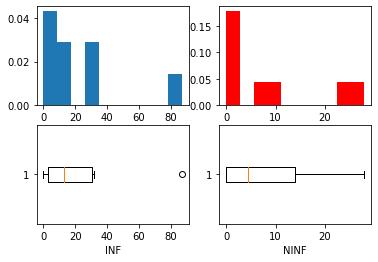

In [3]:
plt.subplot(2,2,1)
plt.hist(INF,density=True, bins=10)


plt.subplot(2,2,3)
plt.boxplot(INF, vert=False)
plt.xlabel('INF')

plt.subplot(2,2,2)
plt.hist(NINF,density=True, bins=10, color='red')

plt.subplot(2,2,4)
plt.boxplot(NINF, vert=False)
plt.xlabel('NINF')

plt.show()




Poisson

In [4]:
y_train=np.concatenate((NINF,INF),axis=0)
xN=np.zeros((NINF.shape))
x=np.ones((INF.shape))
X0=np.concatenate((xN,x),axis=0)

xN=np.zeros((4,))
x=np.ones((4,))
xp=np.concatenate((x,xN),axis=0)
X1=np.tile(xp,2)

xN=np.zeros((2,))
x=np.ones((2,))
xp=np.concatenate((x,xN),axis=0)
X2=np.tile(xp,4)

xN=np.zeros((1,))
x=np.ones((1,))
xp=np.concatenate((x,xN),axis=0)
X3=np.tile(xp,8)

X=np.column_stack((X0,X1,X2,X3,y_train))

<ipython-input-5-42f8b9e14d7c>:8: RuntimeWarning: divide by zero encountered in log
  plt.scatter(X0,np.log(y_train))


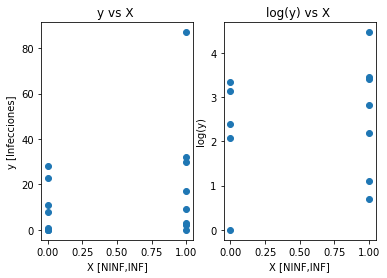

In [5]:
plt.subplot(1,2,1)
plt.scatter(X0,y_train)
plt.xlabel('X [NINF,INF]')
plt.ylabel('y [Infecciones]')
plt.title('y vs X ')

plt.subplot(1,2,2)
plt.scatter(X0,np.log(y_train))
plt.xlabel('X [NINF,INF]')
plt.ylabel('log(y)')
plt.title('a=0.5 ')
plt.title('log(y) vs X ')


plt.show()

In [6]:
import statsmodels.api as sm # libreria

#los datos como un data frame

df=pd.DataFrame(X)
df.columns=['Infec','Plan_Ces','Antib','Fact_r','Ocurrencia'] #variables indicadoras

df=sm.add_constant(df) #agrega constante

In [7]:
df.head(20)

,const,Infec,Plan_Ces,Antib,Fact_r,Ocurrencia
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,28.0
3,1.0,0.0,1.0,0.0,0.0,8.0
4,1.0,0.0,0.0,1.0,1.0,11.0
5,1.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,23.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0,1.0,17.0
9,1.0,1.0,1.0,1.0,0.0,2.0


# b) con la función GLM

In [8]:
import statsmodels.formula.api as smf
model = smf.glm("Ocurrencia ~  Plan_Ces + Antib + Fact_r", groups=None, data=df, family=sm.families.Poisson())
results = model.fit()
#const + Infec + Plan_Ces + Antib + Fact_r 
print(results.summary()) #imprime resumen

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Ocurrencia   No. Observations:                   16
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -169.15
Date:                Sat, 10 Oct 2020   Deviance:                       286.76
Time:                        20:42:52   Pearson chi2:                     341.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9685      0.163     12.052      0.0

Los factores Planeación de la cesaria y Antibioticos no son significativos en la respuesta del modelo, mientras que los Factores de riesgo si

In [9]:
y_pred=results.get_prediction().summary_frame() #predicciones con el conjunto de entrenamiento, crea un data frame
y_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,22.101236,2.613281,17.529492,27.865306
1,5.635815,0.952917,4.046071,7.850187
2,24.910716,2.843015,19.917742,31.155326
3,6.352233,1.055945,4.585951,8.798798
4,24.910716,2.843015,19.917742,31.155326


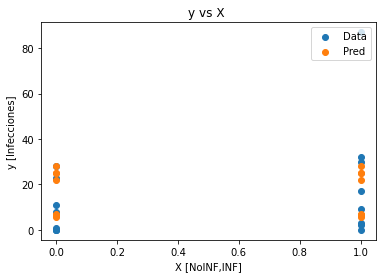

In [10]:
plt.scatter(df['Infec'],df['Ocurrencia'], label='Data')
plt.scatter(df['Infec'],y_pred['mean'],label='Pred')
# Shade between the confidence intervals
#plt.fill_between(df['Infec'], y_pred.iloc[:,2], y_pred.iloc[:,3], color='pink')
plt.xlabel('X [NoINF,INF]')
plt.ylabel('y [Infecciones]')
plt.title('y vs X ')
plt.legend(loc='upper right')
plt.show()

# a) Programa que ajusta un modelo Poisson

In [11]:
# Datos:
X_train=df[['const','Plan_Ces','Antib','Fact_r']].values
y_train=df['Ocurrencia'].values

In [12]:
from _GLM import glm #Clase escrita en python que ajusta modelos GLM 

model=glm(y_train,X_train,family='Poisson') #crea la instancia
results=model.fit() #ajusta el modelo
df=results.summary() #devuelve los resultados como un dataframe
df 

,coef,std err,0.025,0.975
0,1.9685,0.163,1.613,2.324
1,-0.1197,0.126,-0.395,0.156
2,-0.1197,0.126,-0.395,0.156
3,1.3665,0.157,1.025,1.708


Los resultados son muy similares a los obtenidos en el inciso b)